In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset("with/prog.nc")
ini = xr.open_dataset("with/MOM_IC.nc")

In [5]:
ds

<xarray.Dataset>
Dimensions:  (xq: 4, yh: 3, zl: 11, Time: 10, xh: 3, yq: 4, zi: 12)
Coordinates:
  * xq       (xq) float64 0.0 66.67 133.3 200.0
  * yh       (yh) float64 33.33 100.0 166.7
  * zl       (zl) float64 90.91 272.7 454.5 ... 1.545e+03 1.727e+03 1.909e+03
  * Time     (Time) object 0001-01-02 00:00:00 ... 0001-01-11 00:00:00
  * xh       (xh) float64 33.33 100.0 166.7
  * yq       (yq) float64 0.0 66.67 133.3 200.0
  * zi       (zi) float64 0.0 181.8 363.6 545.5 ... 1.636e+03 1.818e+03 2e+03
Data variables:
    u        (Time, zl, yh, xq) float32 ...
    v        (Time, zl, yq, xh) float32 ...
    h        (Time, zl, yh, xh) float64 ...
    e        (Time, zi, yh, xh) float32 2.842e-13 2.842e-13 ... -2e+03 -2e+03
    temp     (Time, zl, yh, xh) float32 ...
    salt     (Time, zl, yh, xh) float32 35.91 35.91 35.91 ... 34.09 34.09 34.09
    ea       (Time, zl, yh, xh) float32 ...
    eb       (Time, zl, yh, xh) float32 ...
Attributes:
    filename:   prog.nc
    title:      MOM resting experiment
    grid_type:  regular
    grid_tile:  N/A

In [3]:
ds['e'].mean(['xh','yh']).isel(zi=0)

<xarray.DataArray 'e' (Time: 29)>
array([  -8.64,  -17.28,  -25.92,  -34.56,  -43.2 ,  -51.84,  -60.48,
        -69.12,  -77.76,  -86.4 ,  -95.04, -103.68, -112.32, -120.96,
       -129.6 , -138.24, -146.88, -155.52, -164.16, -172.8 , -181.44,
       -190.08, -198.72, -207.36, -216.  , -224.64, -233.28, -241.92,
       -250.56], dtype=float32)
Coordinates:
  * Time     (Time) object 0001-01-02 00:00:00 ... 0001-01-30 00:00:00
    zi       float64 0.0

Initial depths: [[    0.          -181.81818182  -363.63636364  -545.45454545
   -727.27272727  -909.09090909 -1090.90909091 -1272.72727273
  -1454.54545455 -1636.36363636 -1818.18181818 -2000.        ]]


/home/fdf/anaconda3/envs/otec/lib/python3.9/site-packages/nc_time_axis/__init__.py:359: CFWarning: this date/calendar/year zero convention is not supported by CF
  lower = cftime.num2date(vmin, self.date_unit, calendar=self.calendar)
/home/fdf/anaconda3/envs/otec/lib/python3.9/site-packages/nc_time_axis/__init__.py:405: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(dt, self.date_unit, calendar=self.calendar)
/home/fdf/anaconda3/envs/otec/lib/python3.9/site-packages/nc_time_axis/__init__.py:454: CFWarning: this date/calendar/year zero convention is not supported by CF
  return cftime.date2num(ticks, self.date_unit, calendar=self.calendar)
/home/fdf/anaconda3/envs/otec/lib/python3.9/site-packages/nc_time_axis/__init__.py:228: CFWarning: this date/calendar/year zero convention is not supported by CF
  dt = cftime.num2date(x, self.time_units, calendar=self.calendar)


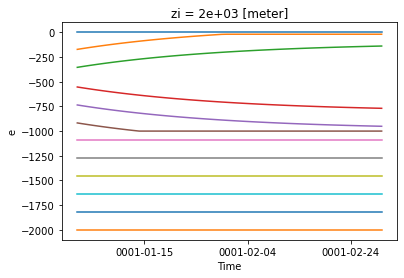

In [3]:
# Graph the depth of each layer over time
print('Initial depths:', ini['eta'].mean(['lath', 'lonh']).data)
e = ds['e'].mean(['yh', 'xh'])
for z in ds['zi']:
    e.sel(zi=z).plot()
    
# Reverse engineer the value of w_otec.
#print('w_otec=', (e[0,0] - e[1,0])/(5*24*3600))

/home/fdf/anaconda3/envs/otec/lib/python3.9/site-packages/nc_time_axis/__init__.py:359: CFWarning: this date/calendar/year zero convention is not supported by CF
  lower = cftime.num2date(vmin, self.date_unit, calendar=self.calendar)
/home/fdf/anaconda3/envs/otec/lib/python3.9/site-packages/nc_time_axis/__init__.py:405: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(dt, self.date_unit, calendar=self.calendar)
/home/fdf/anaconda3/envs/otec/lib/python3.9/site-packages/nc_time_axis/__init__.py:454: CFWarning: this date/calendar/year zero convention is not supported by CF
  return cftime.date2num(ticks, self.date_unit, calendar=self.calendar)
/home/fdf/anaconda3/envs/otec/lib/python3.9/site-packages/nc_time_axis/__init__.py:228: CFWarning: this date/calendar/year zero convention is not supported by CF
  dt = cftime.num2date(x, self.time_units, calendar=self.calendar)


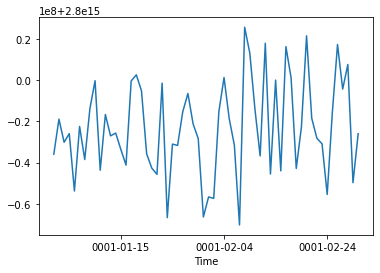

In [4]:
salt = ds['salt'].mean(['xh','yh']) * ds['h'].mean(['xh','yh']) * (200000**2)
#for z in ds['zl']:
 #   salt.sel(zl=z).plot()

salt.sum('zl').plot()

(2000.0, 0.0)

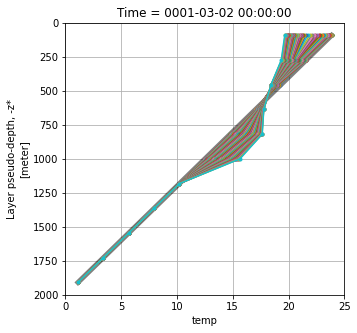

In [5]:


plt.figure(figsize=(5,5))

ini['Temp'].mean(['lath', 'lonh']).plot(y='Layer', color='k', lw=5., alpha=0.5)
for t in ds['Time']:
    ds['temp'].sel(Time=t).mean(['xh', 'yh']).plot(y='zl', marker=".")
plt.grid(True)
plt.ylim(2000, 0)